<a href="https://colab.research.google.com/github/carnival77/Machine_Learning/blob/master/Assignment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Input Data**

* load the data file ('mnist_test.csv')
* each row of the data consists of the label and the image pixel values in a vector form
* the label is one of the 10 digits from 0 to 9
* the image represents one of the 10 digits from 0 to 9 in grey scale and its size is 28x28

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import csv

file_data   = "/content/drive/My Drive/Colab Notebooks/assignment9/mnist.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form
#
# list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_training_image = np.empty((size_row * size_col, 6000), dtype=float)
list_testing_image = np.empty((size_row * size_col, 4000), dtype=float)

# list_label  = np.empty(num_image, dtype=int)
list_training_label  = np.empty(6000, dtype=int)
list_testing_label  = np.empty(4000, dtype=int)

for line in enumerate(data):

  if(line[0]<6000):

    line_data   = line[1].split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_training_label[count]       = label
    list_training_image[:, count]    = im_vector

    count += 1
  
  else:
    count = 0 
  
    line_data   = line[1].split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_testing_label[count]       = label
    list_testing_image[:, count]    = im_vector

    count += 1

# list_training_image : 784 x 6000
# list_testing_image  : 784 x 4000

In [0]:
# np.random.seed(0)

mu,sigma = 0.0,1.0

# rand_norm = np.random.normal(mu,sigma,size=28*28)

def sigmoid(x):
    return 1 / (1 +np.exp(-x))

class Layer:
  def __init__(self,n_neurons,n_inputs,n):
    np.random.seed(n)
    self.weights = np.random.normal(mu,sigma,(n_neurons ,n_inputs))
    self.biases = np.zeros(n_neurons)
  # def get_weights(self):
  #   return self.weights
  def forward(self,inputs, weights):
    self.output = sigmoid(np.dot(weights,inputs) + self.biases)  
    return self.output

# self.biases = np.ones((1,n_neurons))

# self.weights = np.random.randn(n_neurons,n_inputs)

# for b,w in zip(self.biases, self.weights):
#   self.output = sigmoid(np.dot(w,inputs) + b)

# self.output = sigmoid(np.dot(self.weights,inputs) + self.biases)

x = inputs ( T_list_training_image )

y = layer1_output

z = layer2_output

h = layer3_output

In [0]:
layer1 = Layer(196,784,1)
layer2 = Layer(49,196,2)
layer3 = Layer(10,49,3)

In [0]:
T_list_training_image = np.array(list_training_image).T # 6000 x 784. inputs x

T_list_testing_image = np.array(list_testing_image).T # 4000 x 784. inputs x

u = layer1.weights # 196 x 784

v = layer2.weights # 49 x 196

w = layer3.weights # 10 x 49

training

In [0]:
def calculus(m, u, v, w, list_image, learning_rate, list_training_label):


  correct_image=[]
  correct_label=[]

  incorrect_image=[]
  incorrect_label=[]

  arr_OF=[]
  for i in range(m):
    arr_OF.append([])

  b=[]

  count=0
  for i in range(10):
    a=[]
    for j in range(10):
      if j == count:
        a.append(1)
      else:
        a.append(0)
    b.append(a)
    count+=1

  label_filter = np.array(b)

  OF = 0

  accuracy_count = 0

  accuracy_rate_arr=[]

  for i in range(m):

    h_max = 0
    co_vs_inco=0
    predict_label = 0

    x = list_image[i] # 784 x 1

    y = layer1.forward(x,u) # 196 x 1

    # T_y = np.array(y).T

    z = layer2.forward(y,v)  # 49 x 1

    # T_z = np.array(z).T

    h = layer3.forward(z,w)  # 10 x 1

    h_max = np.max(h)

    # print(h,h_max)

    for a in enumerate(h):
      if a[1] == h_max:
        predict_label = a[0]

    for j in range(10):

      if list_training_label[i] == j:

        co_vs_inco = 1
        
        arr_OF[i] = OF

        if predict_label == j:
          accuracy_count += 1
          # print(predict_label,j)

        accuracy_rate_arr.append(accuracy_count/m*100)

        # OF += np.dot(-label_filter[j], np.log10(h)) - np.dot((1-label_filter[j]),np.log10(1-h))
        OF = np.sum((-label_filter[j] * np.log10(h)) - ((1-label_filter[j]) * np.log10(1-h)))/m

        T_label_filter = np.array(label_filter[j]).T

        # h_label = - list_training_label[i] * (1-h)

        # h_label = - T_label_filter * (1-h)

        # h_label = h - T_label_filter

        h_label = h - T_label_filter

        h_label = h_label.reshape(10,1)

        t_z1 = z.reshape(1,49)

        part1 = np.dot(h_label,t_z1) # 10 x 49

        w -= learning_rate * part1
        # 10 x 49

        t_y = y.reshape(1,196)

        t_w = np.array(w).T # 49 x 10

        # t_part1 = np.array(part1).T # 49 x 10

        t_z2 = z.reshape(49,1)

        part2 = np.dot(np.dot(t_w,part1), np.dot((1 - t_z2),t_y )) # 49 x 196

        v -= learning_rate * part2
        # v -= learning_rate * label_filter * (1 - h) * z * w * (1 - z) * y
        # 49 x 196

        t_part2 = np.array(part2).T # 196 x 49

        t_x = x.reshape(1,784)

        t_v = np.array(v).T # 196 x 49

        # part3 = np.dot(np.dot(t_part2,v),y * (1 - y))
        part3 = np.dot(np.dot(t_v,part2),(1 - y))

        t_part3 = part3.reshape(196,1)

        u -= learning_rate * np.dot(t_part3 ,t_x)
        # u -= learning_rate * label_filter * (1 - h) * z * w * (1 - z) * y * v * y * (1 - y) * x
        # u -= learning_rate * label_filter * (1 - h) * z * w * (1 - z) * v * y * (1 - y) * x
        # 196 x 784

        correct_image.append(x)
        correct_label.append(j)

        a = j

        break

      else:
        incorrect_image.append(x)
        incorrect_label.append(j)

    # if co_vs_inco == 0 :
      

  return [arr_OF,u,v,w,accuracy_count,accuracy_rate_arr,correct_image,correct_label,incorrect_image,incorrect_label]

In [0]:
learning_rate = 0.001

training_result = calculus(6000,u,v,w,T_list_training_image,learning_rate, list_training_label)

training_arr_OF = training_result[0]
updated_u=training_result[1]
updated_v=training_result[2]
updated_w=training_result[3]
training_accuracy_count=training_result[4]
training_accuracy_rate_arr=training_result[5]
correct_image=training_result[6]
correct_label=training_result[7]
incorrect_image=training_result[8]
incorrect_label=training_result[9]

# testing_arr_OF = calculus(4000,u,v,w,T_list_testing_image,learning_rate)

# print(arr_OF)

test

In [0]:
# correct_image = np.empty((size_row * size_col, 10), dtype=float)
# correct_label = np.empty(10, dtype=int)

# incorrect_image = np.empty((size_row * size_col, 10), dtype=float)
# incorrect_label = np.empty(10, dtype=int)

# correct_image=[]
# correct_label=[]

# incorrect_image=[]
# incorrect_label=[]


arr_OF=[]
for i in range(4000):
  arr_OF.append([])

accuracy_rate_arr=[]
accuracy_count=0

count=0

for i in range(4000):

  co_decision=0

  h_max = 0
  predict_label = 0

  x = T_list_testing_image[i] # 784 x 1

  y = layer1.forward(x,updated_u) # 196 x 1

  # T_y = np.array(y).T

  z = layer2.forward(y,updated_v)  # 49 x 1

  # T_z = np.array(z).T

  h = layer3.forward(z,updated_w)  # 10 x 1

  for a in enumerate(h):
    if a[1] == h_max:
      predict_label = a[0]

  for j in range(10):

      if list_training_label[i] == j:
        
        # OF += np.dot(-label_filter[j], np.log10(h)) - np.dot((1-label_filter[j]),np.log10(1-h))
        OF = np.sum((-label_filter[j] * np.log10(h)) - ((1-label_filter[j]) * np.log10(1-h)))/m
        
        arr_OF[i] = OF

        if predict_label == j:
          accuracy_count += 1
          co_decision = 1

        accuracy_rate_arr.append(accuracy_count/4000*100)

        break

  # if co_decision == 0:
  #   incorrect_image.append(x)
  #   incorrect_label.append(j)

        # correct_image.append(T_list_testing_image[i])
        # correct_label.append(j)

      # else:

        # incorrect_image.append(T_list_testing_image[i])
        # incorrect_label.append(j)


testing_arr_OF = arr_OF
testing_accuracy_count = accuracy_count
testing_accuracy_rate_arr = accuracy_rate_arr

Training loss curve

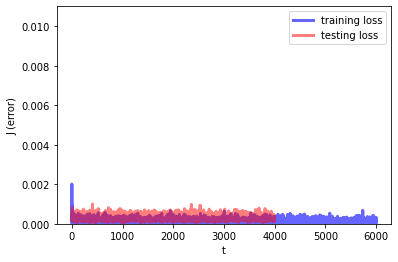

In [1321]:
fig = plt.figure()
ax= fig.add_subplot(1,1,1)

OF_training_loss_curve=np.array(training_arr_OF,dtype=float)
OF_testing_loss_curve=np.array(testing_arr_OF,dtype=float)

t1=np.arange(0,6000,step=1)
t2=np.arange(0,4000,step=1)

plt.xlabel('t')
plt.ylabel('J (error)')

plt.plot(t1,OF_training_loss_curve,color="blue",label="training loss",alpha=0.6,linewidth=3)
plt.plot(t2,OF_testing_loss_curve,color="red",label="testing loss",alpha=0.5,linewidth=3)
ax.set_ylim([0.0,0.011])
# plt.plot(t,lambda_3_training_err,color="blue",label="lambda 3 under-fitting")

plt.legend()
plt.show()

accuracy curve

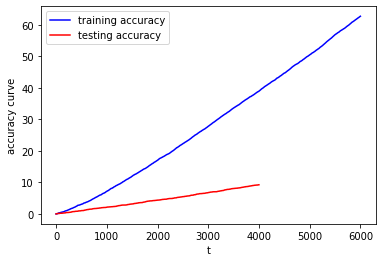

In [1322]:
training_accuracy_curve=np.array(training_accuracy_rate_arr,dtype=float)
testing_accuracy_curve=np.array(testing_accuracy_rate_arr,dtype=float)

t1=np.arange(0,6000,step=1)
t2=np.arange(0,4000,step=1)

plt.xlabel('t')
plt.ylabel('accuracy curve')

plt.plot(t1,training_accuracy_curve,color="blue",label="training accuracy")
plt.plot(t2,testing_accuracy_curve,color="red",label="testing accuracy")
# plt.plot(t,lambda_3_training_err,color="blue",label="lambda 3 under-fitting")

plt.legend()
plt.show()

accuracy value

In [1323]:
print("training accuracy : ",training_accuracy_count/6000*100,"%")
print("testing accuracy : ",testing_accuracy_count/4000*100,"%")

training accuracy :  62.73333333333333 %
testing accuracy :  9.25 %


showing images

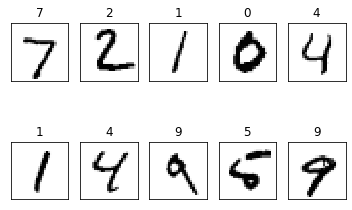

In [1324]:
f2 = plt.figure(1)

for i in range(10):

    plt_label   = correct_label[i]
    im_vector   = correct_image[i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(plt_label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

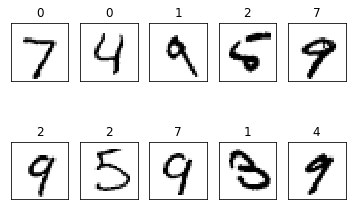

In [1333]:
f2 = plt.figure(1)

for i in range(10):

    plt_label   = incorrect_label[10*i]
    im_vector   = incorrect_image[10*i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(plt_label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

In [0]:
# def calculus(m, u, v, w, list_image, learning_rate):

#   arr_OF=[]
#   for i in range(m):
#     arr_OF.append([])

#   OF = 0

#   for i in range(m):

#     result_forward = feed_forward(u,v,w,list_image)

#     y = result_forward[0]
#     z = result_forward[1]
#     h = result_forward[2]

#     for j in range(10):

#       if list_training_label[i] == j:
        
#         # OF += np.dot(-label_filter[j], np.log10(h)) - np.dot((1-label_filter[j]),np.log10(1-h))
#         OF = np.sum((-label_filter[j] * np.log10(h)) - ((1-label_filter[j]) * np.log10(1-h)))/m
        
#         arr_OF[i] = OF

#         result_bp = back_propagation(u,v,w,y,z,h,learning_rate)

#         u = result_bp[0]
#         v = result_bp[1]
#         w = result_bp[2]

#         # T_label_filter = np.array(label_filter[j]).T

#         # # h_label = - list_training_label[i] * (1-h)

#         # # h_label = - T_label_filter * (1-h)

#         # # h_label = h - T_label_filter

#         # h_label = h - T_label_filter

#         # h_label = h_label.reshape(10,1)

#         # t_z1 = z.reshape(1,49)

#         # part1 = np.dot(h_label,t_z1) # 10 x 49

#         # w -= learning_rate * part1
#         # # 10 x 49

#         # t_y = y.reshape(1,196)

#         # t_part1 = np.array(part1).T # 49 x 10

#         # t_z2 = z.reshape(49,1)

#         # part2 = np.dot(np.dot(t_part1,w), np.dot((1 - t_z2),t_y )) # 49 x 196

#         # v -= learning_rate * part2
#         # # v -= learning_rate * label_filter * (1 - h) * z * w * (1 - z) * y
#         # # 49 x 196

#         # t_part2 = np.array(part2).T # 196 x 49

#         # t_x = x.reshape(1,784)

#         # part3 = np.dot(np.dot(t_part2,v),y * (1 - y))

#         # t_part3 = part3.reshape(196,1)

#         # u -= learning_rate * np.dot(t_part3 ,t_x)
#         # # u -= learning_rate * label_filter * (1 - h) * z * w * (1 - z) * y * v * y * (1 - y) * x
#         # # 196 x 784

#   return arr_OF

In [0]:
# def back_propagation(u,v,w,y,z,h,learning_rate):

#   b=[]

#   count=0
#   for i in range(10):
#     a=[]
#     for j in range(10):
#       if j == count:
#         a.append(1)
#       else:
#         a.append(0)
#     b.append(a)
#     count+=1

#   label_filter = np.array(b)

#   T_label_filter = np.array(label_filter[j]).T

#   # h_label = - list_training_label[i] * (1-h)

#   # h_label = - T_label_filter * (1-h)

#   # h_label = h - T_label_filter

#   h_label = h - T_label_filter

#   h_label = h_label.reshape(10,1)

#   t_z1 = z.reshape(1,49)

#   part1 = np.dot(h_label,t_z1) # 10 x 49

#   w -= learning_rate * part1
#   # 10 x 49

#   t_y = y.reshape(1,196)

#   t_part1 = np.array(part1).T # 49 x 10

#   t_z2 = z.reshape(49,1)

#   part2 = np.dot(np.dot(t_part1,w), np.dot((1 - t_z2),t_y )) # 49 x 196

#   v -= learning_rate * part2
#   # v -= learning_rate * label_filter * (1 - h) * z * w * (1 - z) * y
#   # 49 x 196

#   t_part2 = np.array(part2).T # 196 x 49

#   t_x = x.reshape(1,784)

#   part3 = np.dot(np.dot(t_part2,v),y * (1 - y))

#   t_part3 = part3.reshape(196,1)

#   u -= learning_rate * np.dot(t_part3 ,t_x)
#   # u -= learning_rate * label_filter * (1 - h) * z * w * (1 - z) * y * v * y * (1 - y) * x
#   # 196 x 784

#   return [u,v,w]

In [0]:
# def feed_forward(u,v,w,list_image): 

#   x = list_image[i] # 784 x 1

#   y = layer1.forward(x,u) # 196 x 1

#   # T_y = np.array(y).T

#   z = layer2.forward(y,v)  # 49 x 1

#   # T_z = np.array(z).T

#   h = layer3.forward(z,w)  # 10 x 1

#   return [y,z,h]

백업

In [0]:
# def calculus(m, u, v, w, list_image, learning_rate):

#   arr_OF=[]
#   for i in range(6000):
#     arr_OF.append([])

#   b=[]

#   count=0
#   for i in range(10):
#     a=[]
#     for j in range(10):
#       if j == count:
#         a.append(1)
#       else:
#         a.append(0)
#     b.append(a)
#     count+=1

#   label_filter = np.array(b)

#   OF = 0 

#   for i in range(m):

#     x = list_image[i] # 784 x 1

#     y = layer1.forward(x,u) # 196 x 1

#     # T_y = np.array(y).T

#     z = layer2.forward(y,v)  # 49 x 1

#     # T_z = np.array(z).T

#     h = layer3.forward(z,w)  # 10 x 1

#     for j in range(10):

#       if list_training_label[i] == j:
        
#         # OF += np.dot(-label_filter[j], np.log10(h)) - np.dot((1-label_filter[j]),np.log10(1-h))
#         OF = np.sum((-label_filter[j] * np.log10(h)) - ((1-label_filter[j]) * np.log10(1-h)))/m
        
#         arr_OF[i] = OF

#         T_label_filter = np.array(label_filter[j]).T

#         # h_label = - list_training_label[i] * (1-h)

#         # h_label = - T_label_filter * (1-h)

#         # h_label = h - T_label_filter

#         h_label = h - T_label_filter

#         h_label = h_label.reshape(10,1)

#         t_z1 = z.reshape(1,49)

#         part1 = np.dot(h_label,t_z1) # 10 x 49

#         w -= learning_rate * part1
#         # 10 x 49

#         t_y = y.reshape(1,196)

#         t_part1 = np.array(part1).T # 49 x 10

#         t_z2 = z.reshape(49,1)

#         part2 = np.dot(np.dot(t_part1,w), np.dot((1 - t_z2),t_y )) # 49 x 196

#         v -= learning_rate * part2
#         # v -= learning_rate * label_filter * (1 - h) * z * w * (1 - z) * y
#         # 49 x 196

#         t_part2 = np.array(part2).T # 196 x 49

#         t_x = x.reshape(1,784)

#         part3 = np.dot(np.dot(t_part2,v),y * (1 - y))

#         t_part3 = part3.reshape(196,1)

#         u -= learning_rate * np.dot(t_part3 ,t_x)
#         # u -= learning_rate * label_filter * (1 - h) * z * w * (1 - z) * y * v * y * (1 - y) * x
#         # 196 x 784

#   return arr_OF

#**Result**
#**1. Plot the loss curve**

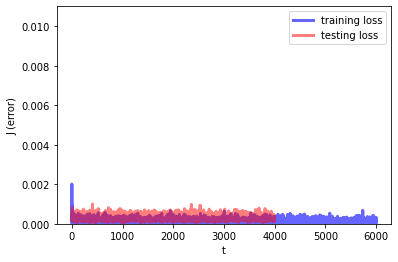

In [1334]:
fig = plt.figure()
ax= fig.add_subplot(1,1,1)

OF_training_loss_curve=np.array(training_arr_OF,dtype=float)
OF_testing_loss_curve=np.array(testing_arr_OF,dtype=float)

t1=np.arange(0,6000,step=1)
t2=np.arange(0,4000,step=1)

plt.xlabel('t')
plt.ylabel('J (error)')

plt.plot(t1,OF_training_loss_curve,color="blue",label="training loss",alpha=0.6,linewidth=3)
plt.plot(t2,OF_testing_loss_curve,color="red",label="testing loss",alpha=0.5,linewidth=3)
ax.set_ylim([0.0,0.011])
# plt.plot(t,lambda_3_training_err,color="blue",label="lambda 3 under-fitting")

plt.legend()
plt.show()

#**2. Plot the accuracy curve**

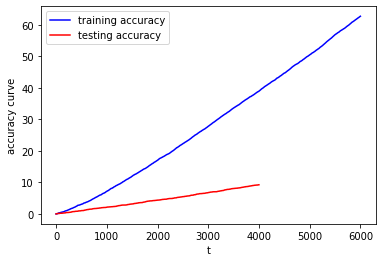

In [1335]:
training_accuracy_curve=np.array(training_accuracy_rate_arr,dtype=float)
testing_accuracy_curve=np.array(testing_accuracy_rate_arr,dtype=float)

t1=np.arange(0,6000,step=1)
t2=np.arange(0,4000,step=1)

plt.xlabel('t')
plt.ylabel('accuracy curve')

plt.plot(t1,training_accuracy_curve,color="blue",label="training accuracy")
plt.plot(t2,testing_accuracy_curve,color="red",label="testing accuracy")
# plt.plot(t,lambda_3_training_err,color="blue",label="lambda 3 under-fitting")

plt.legend()
plt.show()

# **3. Plot the accuracy value**

In [1336]:
print("training accuracy : ",training_accuracy_count/6000*100,"%")
print("testing accuracy : ",testing_accuracy_count/4000*100,"%")

training accuracy :  62.73333333333333 %
testing accuracy :  9.25 %


#**4. Plot the classification example**

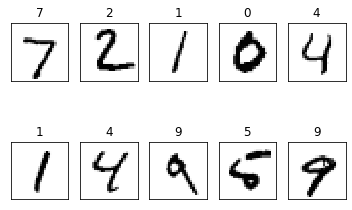

In [1337]:
f2 = plt.figure(1)

for i in range(10):

    plt_label   = correct_label[i]
    im_vector   = correct_image[i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(plt_label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

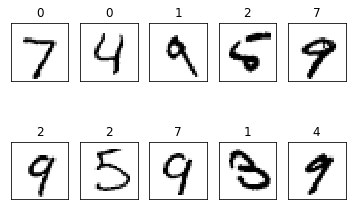

In [1338]:
f2 = plt.figure(1)

for i in range(10):

    plt_label   = incorrect_label[10*i]
    im_vector   = incorrect_image[10*i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(plt_label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()